### 第4章: 言語解析

問題30から問題35までは、以下の文章text（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [31]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

In [11]:
from sudachipy import dictionary

tokenizer_obj = dictionary.Dictionary().create()
tokens = tokenizer_obj.tokenize(text)

with open('melos_sudachi.txt', 'w', encoding='utf-8') as f:
    for token in tokens:
        surface = token.surface()
        part_of_speech = token.part_of_speech()
        dictionary_form = token.dictionary_form()

        f.write(f'{surface}\t{part_of_speech}\t{dictionary_form}\n')

In [17]:
import re
melos_dcts = []
with open('melos_sudachi.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if not line:
            continue
        data = line.split('\t')
        if data[0].startswith("("):
            continue
        else:
            surface = data[0]
            pos = data[1].split(",")[0]
            pos = re.findall(r"'(.*?)'", pos)
            base = data[2]
            melos_dcts.append({"surface":surface,"pos":pos[0],"base":base})

In [20]:
"""
30. 動詞
文章textに含まれる動詞をすべて表示せよ。
"""
for dct in melos_dcts:
    if dct["pos"] == "動詞":
        print(dct["surface"])

し
除か
なら
し
わから
ある
吹き
遊ん
暮し
来
対し
あっ


In [22]:
"""
31. 動詞の原型
文章textに含まれる動詞と、その原型をすべて表示せよ。
"""
for dct in melos_dcts:
    if dct["pos"] == "動詞":
        print(f"動詞；{dct['surface']}, 原型：{dct['base']}")

動詞；し, 原型：する
動詞；除か, 原型：除く
動詞；なら, 原型：なる
動詞；し, 原型：する
動詞；わから, 原型：わかる
動詞；ある, 原型：ある
動詞；吹き, 原型：吹く
動詞；遊ん, 原型：遊ぶ
動詞；暮し, 原型：暮す
動詞；来, 原型：来る
動詞；対し, 原型：対する
動詞；あっ, 原型：ある


In [27]:
"""
32. 「AのB」
文章textにおいて、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。
"""
for idx, dct in enumerate(melos_dcts):
    if melos_dcts[idx-1]["pos"] == "名詞" and dct["surface"] == "の" and melos_dcts[idx+1]["pos"] == "名詞":
        surfaces = [d["surface"] for d in melos_dcts[idx-1:idx+2]]  # 3つのsurfaceを取り出して
        print("".join(surfaces))


暴虐の王
村の牧人


In [ ]:
"""
33. 係り受け解析
文章textに係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。
"""
import spacy

nlp = spacy.load("ja_ginza")

doc = nlp(text)

for token in doc:
    if token.text == "メロス" and token.dep_ == "nsubj":
        print(f"{token.text}\t{token.head.text}")


メロス	激怒
メロス	牧人


In [43]:
"""
35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。
"""
import spacy
from spacy import displacy

nlp = spacy.load("ja_ginza")

text = "メロスは激怒した。"
doc = nlp(text)

displacy.serve(doc, style="dep", port=8000)




/home/hamamoto/100knocks_2025/.venv/lib/python3.10/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:8000 ...

Shutting down server on port 8000.


In [3]:
"""
36. 単語の出現頻度
問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイルjawiki-country.json.gzをコーパスと見なし、
統計的な分析を行う。

1行に1記事の情報がJSON形式で格納される

各行には記事名が”title”キーに、記事本文が”text”キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される

ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。
そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。
"""

import json
import gzip
import re
from collections import Counter
from janome.tokenizer import Tokenizer

def remove_makeup(text):
    text = re.sub(r"\'{2,5}", "", text)
    text = re.sub(r"\={2,6}", "", text)
    text = re.sub(r"\*{1,2}", "", text)
    text = re.sub(r"\#{1,2}", "", text)
    text = re.sub(r"\:{1,2}", "", text)
    text = re.sub(r"\;{1,2}", "", text)
    text = re.sub(r'\|-', '', text)
    text = re.sub(r'^\|', '', text)
    text = re.sub(r'Category', '', text)
    text = re.sub(r'<[^>]*\[http[^\]]*\][^>]*>', '', text)
    text = re.sub(r'\[http[^\]]*\]', '', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]', r'\1', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r"\{\{.*?\}\}", "", text)
    return text


tokenizer = Tokenizer()
word_counter = Counter()

with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        article = json.loads(line)
        text = article.get("text", "")
        
        text = remove_makeup(text)
        
        for token in tokenizer.tokenize(text):
            if token is not None: 
                surface = token.surface
                pos = token.part_of_speech.split(",")[0]

                word_counter[surface] += 1

for word, freq in word_counter.most_common(20):
    print(word, freq)

  100442
の 88148
、 84204
。 52097
は 51188
に 48836
が 43450
を 37940
た 34843
で 33388
と 27254

 27253
年 27211
| 26291
て 25539
し 25049
= 18533
（ 17764
） 17662
. 15492


In [ ]:
"""
37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。
"""

import json
import gzip
import re
from collections import Counter
from janome.tokenizer import Tokenizer

def remove_makeup(text):
    text = re.sub(r"\'{2,5}", "", text)
    text = re.sub(r"\={2,6}", "", text)
    text = re.sub(r"\*{1,2}", "", text)
    text = re.sub(r"\#{1,2}", "", text)
    text = re.sub(r"\:{1,2}", "", text)
    text = re.sub(r"\;{1,2}", "", text)
    text = re.sub(r'\|-', '', text)
    text = re.sub(r'^\|', '', text)
    text = re.sub(r'Category', '', text)
    text = re.sub(r'<[^>]*\[http[^\]]*\][^>]*>', '', text)
    text = re.sub(r'\[http[^\]]*\]', '', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]', r'\1', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r"\{\{.*?\}\}", "", text)
    return text

tokenizer = Tokenizer()
word_counter = Counter()

with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        article = json.loads(line)
        text = article.get("text", "")
        
        text = remove_makeup(text)
        
        for token in tokenizer.tokenize(text):
            if token is not None: 
                surface = token.surface
                pos = token.part_of_speech.split(",")[0]

                if pos == "名詞":
                    word_counter[surface] += 1

for word, freq in word_counter.most_common(20):
    print(word, freq)
        

年 27211
| 26291
= 18533
. 15492
月 11886
- 11143
日 9245
人 9095
1 8014
国 7400
( 7136
, 6104
|| 5934
2 5776
語 5414
) 5135
的 5002
こと 4571
3 4451
/ 4337


In [5]:
"""
38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。
"""
import json
import gzip
import re
from collections import Counter
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

def remove_makeup(text):
    text = re.sub(r"\'{2,5}", "", text)
    text = re.sub(r"\={2,6}", "", text)
    text = re.sub(r"\*{1,2}", "", text)
    text = re.sub(r"\#{1,2}", "", text)
    text = re.sub(r"\:{1,2}", "", text)
    text = re.sub(r"\;{1,2}", "", text)
    text = re.sub(r'\|-', '', text)
    text = re.sub(r'^\|', '', text)
    text = re.sub(r'Category', '', text)
    text = re.sub(r'<[^>]*\[http[^\]]*\][^>]*>', '', text)
    text = re.sub(r'\[http[^\]]*\]', '', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]', r'\1', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r"\{\{.*?\}\}", "", text)
    return text

def get_nouns(text):
    nouns = []
    for token in tokenizer.tokenize(text):
        pos = token.part_of_speech.split(",")[0]
        if pos == "名詞":
            nouns.append(token.surface)
    return nouns

tokenizer = Tokenizer()

sentence = []
with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        article = json.loads(line)
        if article.get("title", "") != "日本":
            continue
        text = article.get("text", "")
        text = remove_makeup(text)
        sentence.append(text)

vectorizer = TfidfVectorizer(tokenizer=get_nouns, lowercase=False)

X = vectorizer.fit_transform(sentence)

words = vectorizer.get_feature_names_out()

first_doc_vec = X[0].toarray().flatten()

top_indices = first_doc_vec.argsort()[::-1][:20]

print(f"{'単語':<10} {'TF-IDF':<10}")
for idx in top_indices:
    print(f"{words[idx]:<10} {first_doc_vec[idx]:<10.5f}")

/home/hamamoto/100knocks_2025/.venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


単語         TF-IDF    
日本         0.53435   
年          0.43859   
.          0.22633   
|          0.18347   
国          0.16874   
的          0.14196   
-          0.13124   
日          0.12522   
県          0.11919   
世界         0.10982   
人          0.10781   
月          0.10513   
こと         0.10245   
3          0.09642   
2          0.09241   
1          0.09241   
(          0.08504   
関係         0.08370   
,          0.08303   
経済         0.07968   


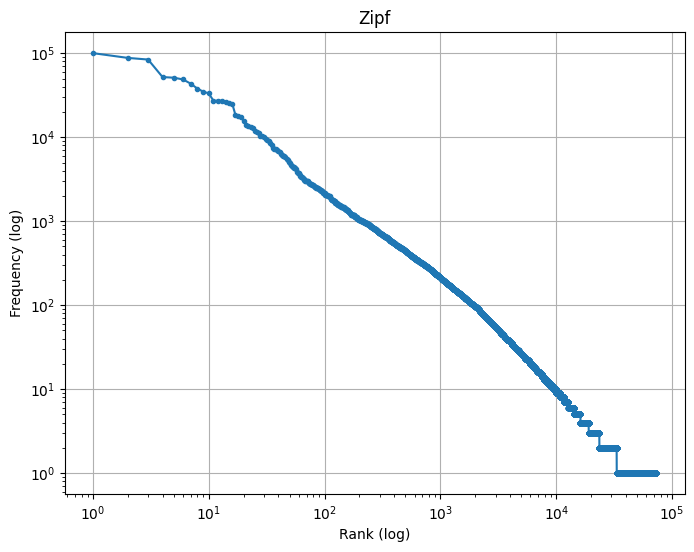

In [7]:
"""
39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。
"""
import json
import gzip
import re
from janome.tokenizer import Tokenizer
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def remove_makeup(text):
    text = re.sub(r"\'{2,5}", "", text)
    text = re.sub(r"\={2,6}", "", text)
    text = re.sub(r"\*{1,2}", "", text)
    text = re.sub(r"\#{1,2}", "", text)
    text = re.sub(r"\:{1,2}", "", text)
    text = re.sub(r"\;{1,2}", "", text)
    text = re.sub(r'\|-', '', text)
    text = re.sub(r'^\|', '', text)
    text = re.sub(r'Category', '', text)
    text = re.sub(r'<[^>]*\[http[^\]]*\][^>]*>', '', text)
    text = re.sub(r'\[http[^\]]*\]', '', text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]', r'\1', text)
    text = re.sub(r"\{\{.*?\}\}", "", text)
    return text

tokenizer = Tokenizer()

word_counter = Counter()

with gzip.open("jawiki-country.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        article = json.loads(line)
        text = article.get("text", "")
        text = remove_makeup(text)
        
        for token in tokenizer.tokenize(text):
            pos = token.part_of_speech.split(",")[0]

            surface = token.surface
            word_counter[surface] += 1

word_freq = word_counter.most_common()

ranks = np.arange(1, len(word_freq) + 1)
frequencies = np.array([freq for word, freq in word_freq])

plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf")
plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.grid(True)
plt.show()

